# Prosper Loan Data Exploration
## by Gloria V

## Preliminary Wrangling

This document explores a Prosper dataset which contains attributes for about 113,000 loans.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

The dataset has 113,937 loans with 81 features. A good amount of the attributes are numeric as it would be expected for a financial dataset. There are also boolean attributes as well as some defined as objects that would be strings. 

### What is/are the main feature(s) of interest in your dataset?

I am interested in finding out the possible correlation between different features and the current Loan Status. Based on the Data Dictionary the the current Loan Status can either be Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the following features might have an effect in the current Loan Status: ProsperRating/ProsperScore. Listing Category. Employment Status. Credit Lines. Delinquencies. DebtToIncomeRatio. Monthly Income. InvestmentFromFriends.



## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [ ]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

In [35]:
# get order of bars by frequency
type_counts = df['LoanStatus'].value_counts()
type_order = type_counts.index

In [47]:
type_counts

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [54]:
type_order

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')

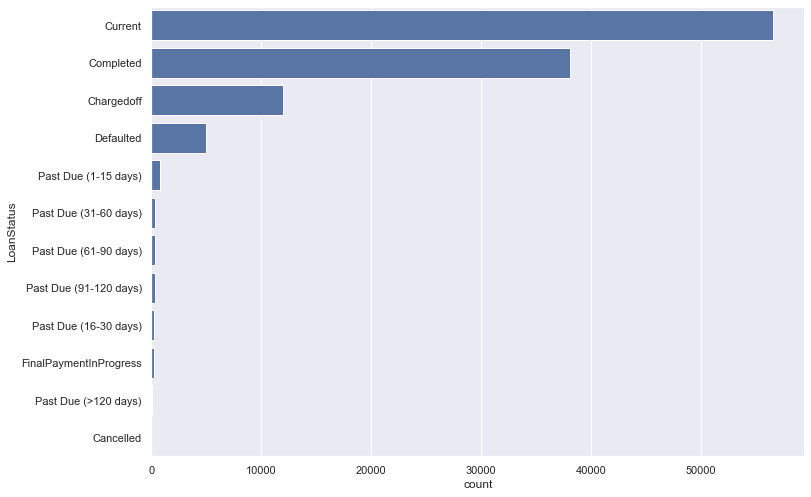

In [37]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'LoanStatus', color = base_color, order = type_order);

In [55]:
pastDueList = ['Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)']
exceptions = []
def LoanStatus(loan):
    try:
        if loan.LoanStatus in pastDueList:
            return 'Past Due'
        elif loan.LoanStatus == 'FinalPaymentInProgress':
            return 'Current'
        else:
            return loan.LoanStatus
    except:
        exceptions.append(loan.ListingNumber)

In [56]:
df['LoanStatusSummary'] = df.apply(LoanStatus, axis = 1)

In [83]:
type_counts = df['LoanStatusSummary'].value_counts()
type_order = type_counts.index

In [84]:
type_counts

Current       56576
Completed     38074
Chargedoff    11992
Defaulted      5018
Past Due       2272
Name: LoanStatusSummary, dtype: int64

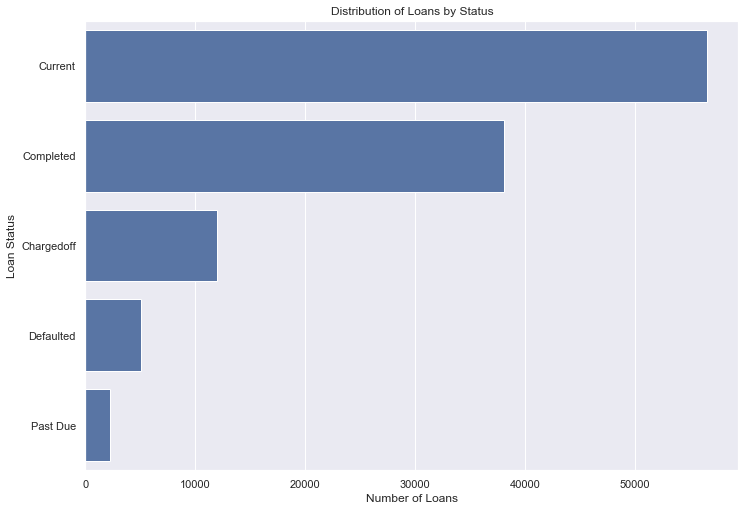

In [89]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'LoanStatusSummary', color = base_color, order = type_order);
plt.title('Distribution of Loans by Status')
plt.ylabel('Loan Status')
plt.xlabel('Number of Loans');

In [65]:
df.query('LoanStatusSummary == "Cancelled"').index

Int64Index([332, 59998, 72480, 97281, 112975], dtype='int64')

In [ ]:
df.drop([332, 59998, 72480, 97281, 112975], inplace=True)

In [67]:
df.query('LoanStatusSummary == "Cancelled"').index

Int64Index([], dtype='int64')

In [24]:
#0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  
level_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_cat)


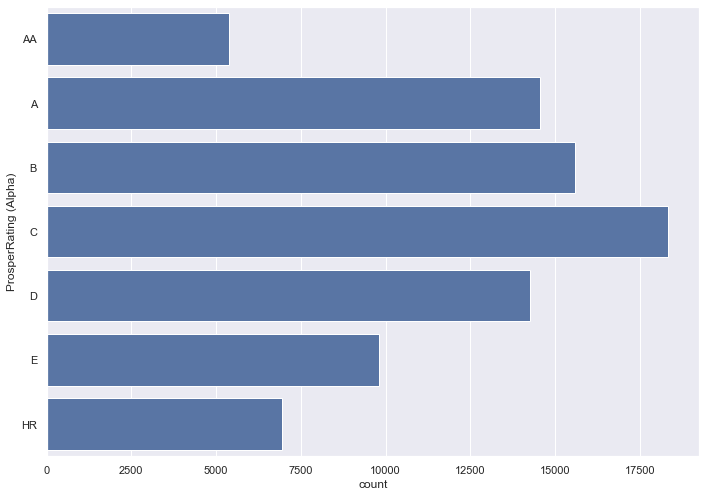

In [33]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'ProsperRating (Alpha)', color = base_color);

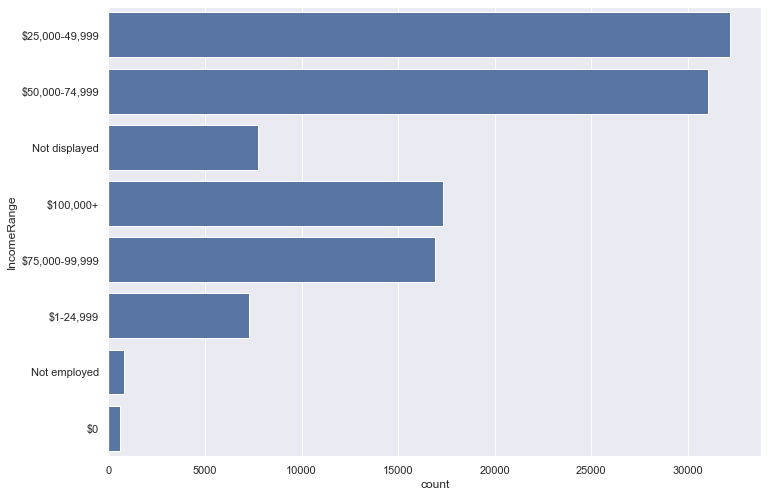

In [34]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'IncomeRange', color = base_color)

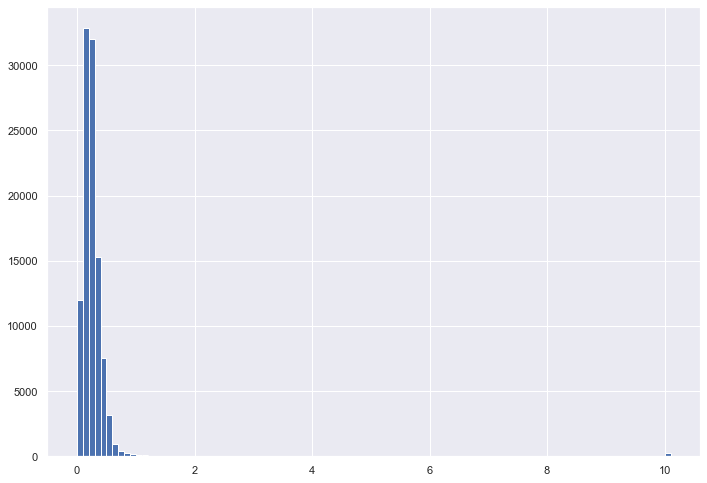

In [74]:
bins = np.arange(0, df['DebtToIncomeRatio'].max()+.1, .1)
plt.hist(df['DebtToIncomeRatio'], bins = bins);

In [70]:
df.DebtToIncomeRatio.describe()

count    105378.000000
mean          0.275952
std           0.551771
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [78]:
df.LoanOriginalAmount
df.query('DebtToIncomeRatio > 1')[['ListingNumber', 'DebtToIncomeRatio', 'Occupation', 'IncomeRange', 'LoanOriginalAmount']]

,ListingNumber,DebtToIncomeRatio,Occupation,IncomeRange,LoanOriginalAmount
22,706927,9.20,Other,"$1-24,999",4000
226,104542,10.01,Other,Not displayed,1000
368,128819,1.65,Sales - Retail,"$1-24,999",16000
419,781432,1.26,Other,"$1-24,999",4000
576,124494,10.01,Homemaker,"$1-24,999",1500
...,...,...,...,...,...
113387,485381,2.38,Administrative Assistant,"$25,000-49,999",1500
113407,274103,2.16,Other,"$1-24,999",1386
113486,523860,1.05,Sales - Retail,"$1-24,999",2500
113626,31681,10.01,NaN,Not displayed,25000


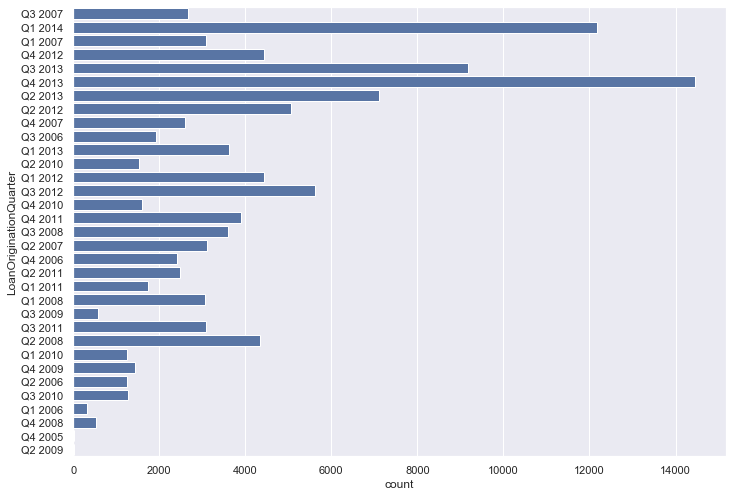

In [19]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'LoanOriginationQuarter', color = base_color);

In [40]:
df.CreditScoreRangeLower.describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

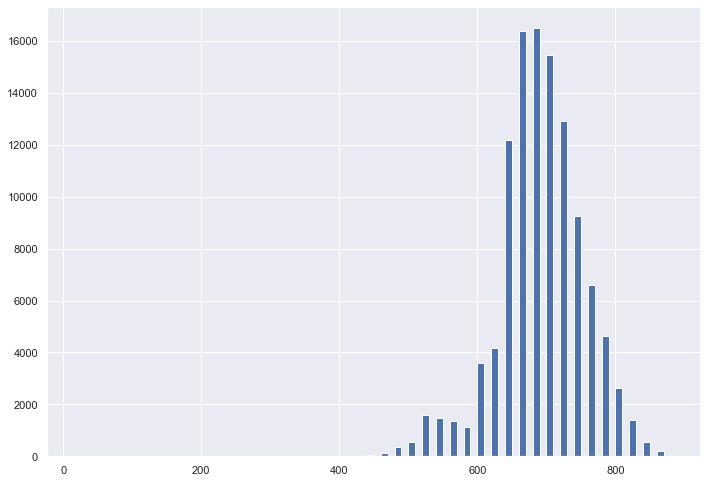

In [39]:
bins = np.arange(20, df['CreditScoreRangeLower'].max()+10, 10)
plt.hist(df['CreditScoreRangeLower'], bins = bins);

(400, 900)

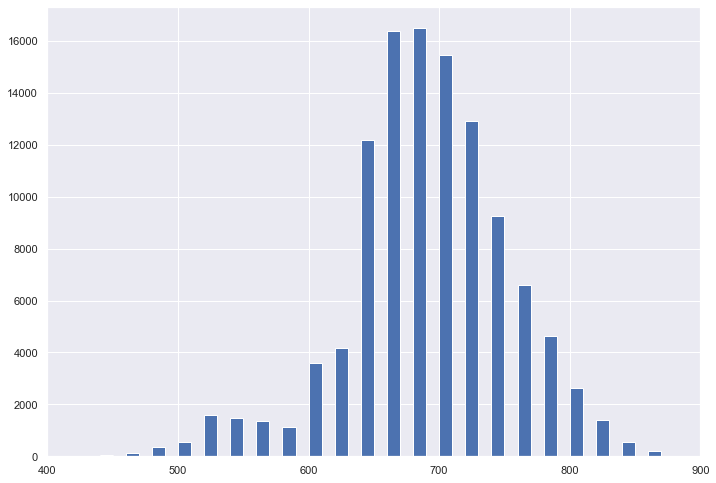

In [46]:
bins = np.arange(20, df['CreditScoreRangeLower'].max()+10, 10)
plt.hist(df['CreditScoreRangeLower'], bins = bins);
plt.xlim(400, 900)

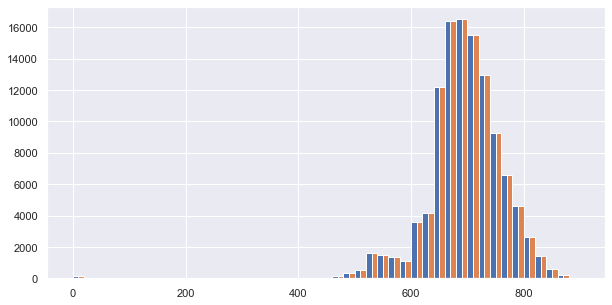

In [45]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['CreditScoreRangeLower'].max()+10, 10)
plt.hist(data = df, x = 'CreditScoreRangeLower', bins = bin_edges)

# example of somewhat too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['CreditScoreRangeUpper'].max()+10, 10)
plt.hist(data = df, x = 'CreditScoreRangeUpper', bins = bin_edges);

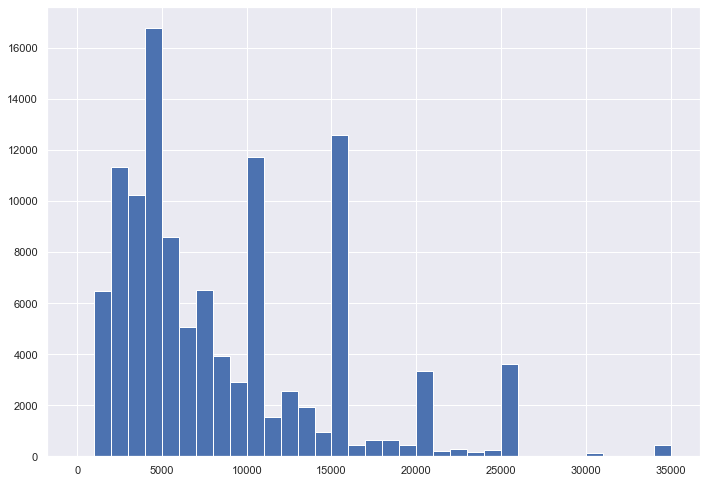

In [51]:
bin_edges = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bin_edges);

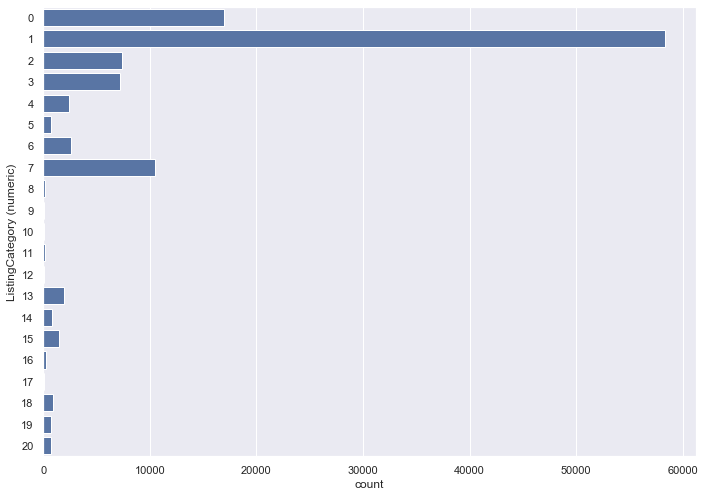

In [53]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'ListingCategory (numeric)', color = base_color);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
g = sb.PairGrid(data = df, vars = ['num_var1', 'num_var2', 'num_var3'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

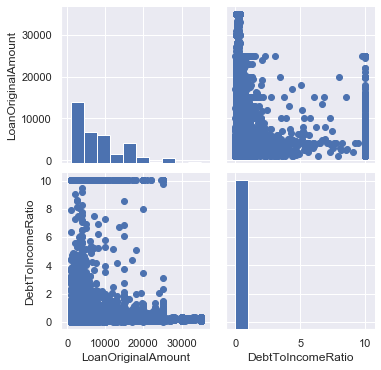

In [90]:

g = sb.PairGrid(data = df, vars = ['LoanOriginalAmount', 'DebtToIncomeRatio'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

(-3053.020437794293, 39318.400445036)

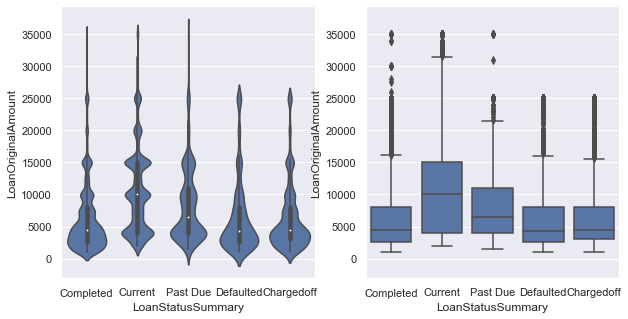

In [93]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'LoanStatusSummary', y = 'LoanOriginalAmount', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'LoanStatusSummary', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot


(-3337.378340840235, 39337.37834084024)

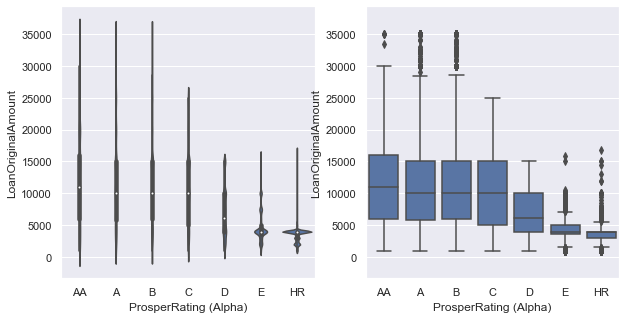

In [92]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot


(-0.898561748671109, 10.908561748671108)

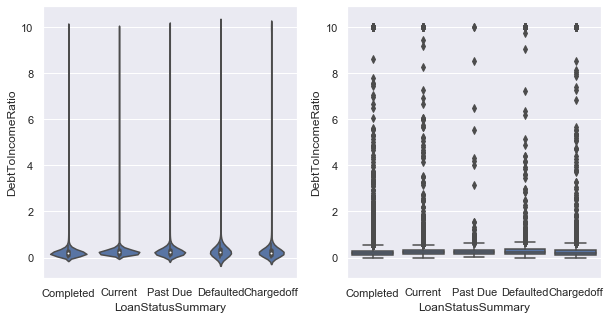

In [94]:
df.DebtToIncomeRatio
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'LoanStatusSummary', y = 'DebtToIncomeRatio', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'LoanStatusSummary', y = 'DebtToIncomeRatio', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot


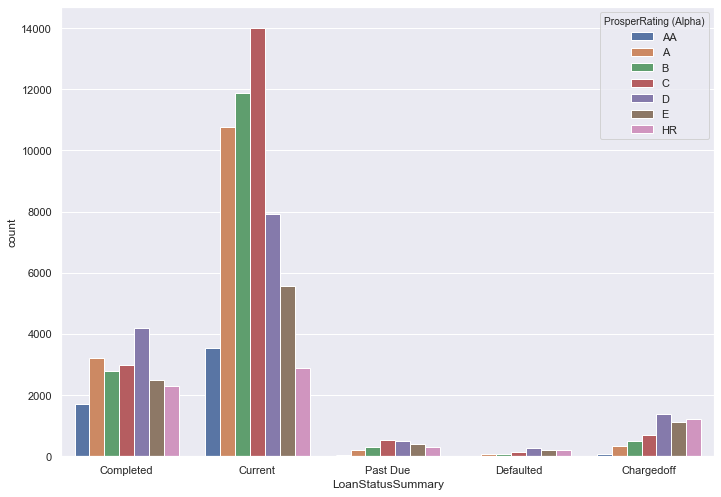

In [95]:
sb.countplot(data = df, x = 'LoanStatusSummary', hue = 'ProsperRating (Alpha)')

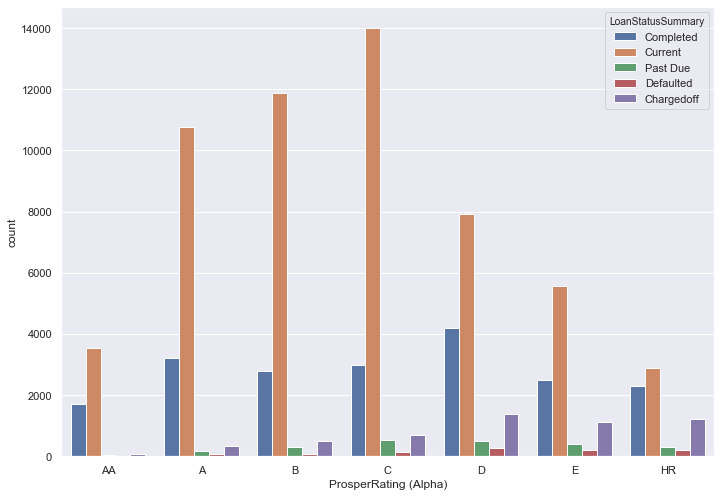

In [96]:
sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue =  'LoanStatusSummary');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!